<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E6%9B%BD%E5%91%82%E5%88%A9%E6%96%B0%E5%B7%A6%E8%A1%9B%E9%96%80%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

・基礎的なプログラミング力を確認する

・読みやすいコードを書くよう心がけるようになる


どのように学ぶか

Python入門課題の発展です。実装やコメントなどを工夫し、読みやすいコードを書くよう心がけてください。

「Pythonを使ってみよう」の問題で扱った紙を折ると月に届く話に似たものとして、曽呂利新左衛門の逸話があります。これを題材にプログラミングを進めます。


秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。

【問題１】100日目の米粒の数

100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
first_day_rices = 1

days = 100
list_time_point = [first_day_rices]
list_total = [list_time_point[0]]
for i in range(days - 1):
  list_time_point.append(list_time_point[-1] * 2)
  list_total.append(list_total[-1] + list_time_point[-1])
print("{}日後にもらう米の数：{}粒".format(days, list_time_point[-1]))
print("{}日後までに累計で貰う米の数：{}粒".format(days, list_total[-1]))

100日後にもらう米の数：633825300114114700748351602688粒
100日後までに累計で貰う米の数：1267650600228229401496703205375粒


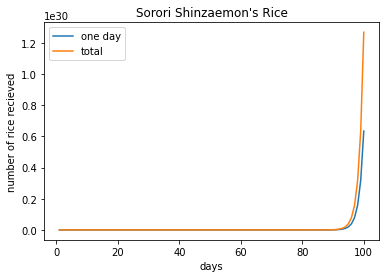

In [3]:
plt.title("Sorori Shinzaemon's Rice")
plt.xlabel("days")
plt.ylabel("number of rice recieved")
plt.plot(range(1, days + 1), list_time_point, label = "one day")
plt.plot(range(1, days + 1), list_total, label = "total")
plt.legend() #グラフが２つになるので凡例を表示しておく。
plt.show()

【問題２】100日目以外の米粒の数

この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コース受講日数でいくつ米粒をもらえるかを答えてください。問題1と同様に折れ線グラフも出力してください。


以下の雛形には関数としての枠組みだけではなく、引数や戻り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

In [19]:
def compute_sorori_shinzaemon(n_days = 100):
    """曽呂利新左衛門の米の逸話における、日にちごとの米の粒の数を計算する関数。
    Parameteres
    -----------
    n_days: int
        米を貰える日数 (default : 100)
    first_day_rices: int
        初日に貰う米  (default : 1)
    Returns
    -------
    list_time_point : list
        ある日に貰う米の数のリスト (リストの長さはn_daysに等しい)
    list_total : list
        ある日までに累計で貰う米の数のリスト (リストの長さはn_daysに等しい)
    """
    # ここにコードを書く。
    list_time_point = [first_day_rices]
    list_total = [list_time_point[0]]
    for i in range(n_days - 1):
      list_time_point.append(list_time_point[-1] * 2)
      list_total.append(list_total[-1] + list_time_point[-1])
    return list_time_point, list_total
list_time_point, list_total = compute_sorori_shinzaemon(n_days=123) #7/1〜10/31は123日
print("コース受講日数は{}日であり、その間でもらえる米粒は{}粒".format(123, list_total[-1]))

コース受講日数は123日であり、その間でもらえる米粒は10633823966279326983230456482242756607粒


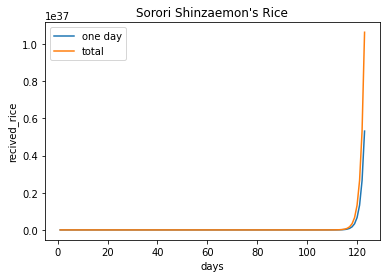

In [18]:
# グラフを表示する。タイトルと軸ラベル名付き。
days = 123
plt.title("Sorori Shinzaemon's Rice")
plt.xlabel("days")
plt.ylabel("recived_rice")
plt.plot(range(1, days + 1), list_time_point, label = "one day")  # 「リスト名」のところにリストの変数名を入れる
plt.plot(range(1, days + 1), list_total, label = "total")  # 「リスト名」のところにリストの変数名を入れる
plt.legend()
plt.show()

【問題３】貰える米で何人が何日生活できるか


この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。


ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [21]:
required_calories = 1800 * 1000
calories_per_crash = 75
def compute_howmany_days(n_crash, n_person = 14):
    """この米があれば、何人の人間が何日生活できるかを計算する関数。
    Parameteres
    -----------
    n_crash: int
        米の粒数 
    n_person: int
        人数 (default : 14)
    Returns
    -----------
    survival_days : int
    　　　　　　　何人の人間が何日生活できるか
    """
    # ここにコードを書く。
    needs = required_calories / calories_per_crash 
    round_of_needs = needs * n_person
    survival_days = list_total[-1] / round_of_needs
    return survival_days
l_, list_total = compute_sorori_shinzaemon(n_days = n_days) #7/1〜10/31は123日
survival_days = compute_howmany_days(list_total[-1], n_person)
print("{}人が{}日生活できます。".format(n_person, survival_days)）
print("その時、米粒の数は{}粒です。".format(list_total[-1]粒です。))

SyntaxError: ignored